<a href="https://colab.research.google.com/github/lucas-allves/projects_public/blob/master/Analisando_os_dados_do_AIRBNB_Santiago%2C_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - Santiago, Región Metropolitana de Santiago, Chile

O [Airbnb](https://www.airbnb.com.br/) é uma empresa americana que opera um mercado online de hospedagem, principalmente casas de família para aluguéis de temporada e atividades de turismo.

O Airbnb não possui nenhuma das propriedades listadas; em vez disso, lucra recebendo comissão de cada reserva.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Santiago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados no projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importando o arquivo listings.csv para um DataFrame

df_santiago = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2021-12-25/visualisations/listings.csv")


## Análise dos Dados

Etapa importante onde conseguimos ter um entedimento inicial de como os dados estão estruturados.


In [ ]:
# mostrar as 5 primeiras entradas

df_santiago.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-08-30,0.22,1,276,4,NaN
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,45652,3,0,NaN,NaN,2,176,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,46513,1,46,2021-11-04,0.34,3,89,1,NaN
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.57,1,266,1,NaN
4,55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0,NaN


**Variáveis do projeto**

Através do comando **head** conseguimos olhar as 5 primeiras entradas e com isso visualizar as variáveis presente no *dataset*.

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


### **1. Quantidade de variáveis e entradas que o conjunto de dados possui. Quais os tipos de variáveis.**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).



*   `object` refere-se a texto.
*   `int` refe-se números inteiros.
* `float` refere-se a números com casa decima.




In [ ]:
# volume de dados do DataFrame
print("Entradas:\t{}".format(df_santiago.shape[0]))
print("Variáveis:\t {}".format(df_santiago.shape[1]))


# verificar os tipos de entradas do dataset
df_santiago.info()

Entradas:	9139
Variáveis:	 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9139 entries, 0 to 9138
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9139 non-null   int64  
 1   name                            9135 non-null   object 
 2   host_id                         9139 non-null   int64  
 3   host_name                       9135 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9139 non-null   object 
 6   latitude                        9139 non-null   float64
 7   longitude                       9139 non-null   float64
 8   room_type                       9139 non-null   object 
 9   price                           9139 non-null   int64  
 10  minimum_nights                  9139 non-null   int64  
 11  number_of_reviews               9139 non-null   int64  
 12  last

Como resultado do método `info`, podemos perceber que algumas variáveis apresentam valores nulos.

### **2. Valores ausentes no *dataset***
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# Quantidade de valores ausentes por atributos

(df_santiago.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               9139
license                           9033
reviews_per_month                 3259
last_review                       3259
host_name                            4
name                                 4
number_of_reviews                    0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
id                                   0
minimum_nights                       0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_id                              0
price                                0
dtype: int64

In [ ]:
# Ordenar de modo decrescente a porcentagem de valores ausentes por variáveis

(df_santiago.isnull().sum() / df_santiago.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.988401
reviews_per_month                 0.356604
last_review                       0.356604
host_name                         0.000438
name                              0.000438
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `license` possui aproximadamente 99% dos valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

### **3. Distribuição das variáveis**

E para isso, iremos plotar um gráfico do tipo histograma.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e15ab05d0>,
      dtype=object)

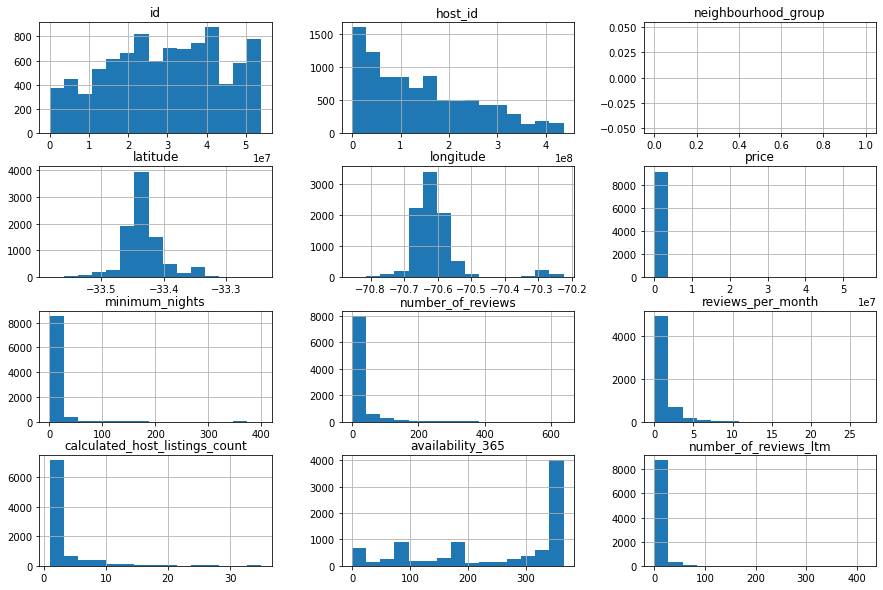

In [ ]:
# plotar o histograma das variáveis numéricas

df_santiago.hist(bins=15, figsize=(15,10))


* Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Exemplos: `price`, `minimum_nights` e `calculated_host_listings_count`.
* Os valores não seguem uma distribuição normal, e distorcem a representação.


### **4. Presença de *outliers***.

Analizando a representação gráfica acima por meio do `hist`podemos identificar indícios de *outliers*.
Para confirmar, existe duas maneiras auxiliam em sua detecção.
* Resumo estatístico por meio do método `describe`
* Plotar o gráfico `boxplots` para a variável candidata.



In [ ]:
# Ver o resumo estatístico das variáveis numéricas

df_santiago[["price", "minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365","number_of_reviews_ltm"]].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.139000e+03,9139.000000,9139.000000,5880.000000,9139.000000,9139.000000,9139.000000
mean,7.999007e+04,7.251231,17.942554,0.910160,3.025605,248.003830,4.292811
std,8.707143e+05,26.967635,40.411300,1.378244,4.312533,127.789544,13.053941
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.153400e+04,1.000000,0.000000,0.110000,1.000000,142.000000,0.000000
50%,3.500000e+04,2.000000,2.000000,0.400000,1.000000,319.000000,0.000000
75%,5.400000e+04,3.000000,16.000000,1.150000,3.000000,364.000000,3.000000
max,5.598833e+07,400.000000,638.000000,27.000000,35.000000,365.000000,418.000000


Observando o resumo estatístico, podemos confirmar algumas hipóteses como:
* A variável `price` possui 75% dos valores abaixo de CLP 54000 pesos (USD 66.48 dólares), porém apresenta um valor máximo de CLP 55,988,330 pesos (USD 69,014.89 dólares).
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.  

Box plot para `price` e `minimum_nights` para visualizar a presença de *outliers*.


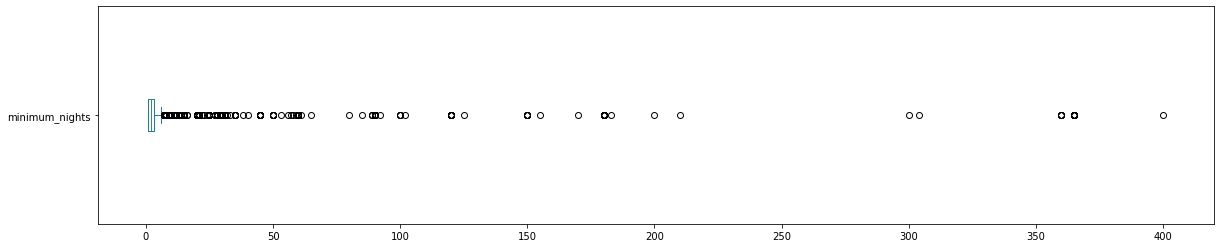

minimum_nights(valores acima de 30):
247 entradas
2.7027%


In [ ]:
# minimum_nights boxplot

df_santiago.minimum_nights.plot(kind='box', vert=False, figsize=(20,4))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights(valores acima de 30):")
print("{} entradas".format(len(df_santiago[df_santiago.minimum_nights > 30])))
print("{:.4f}%".format((len(df_santiago[df_santiago.minimum_nights > 30]) / df_santiago.shape[0])*100))




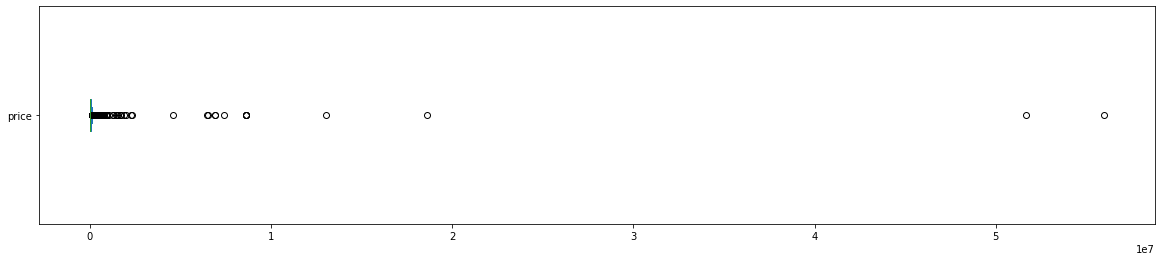


 Preço(valores acima de CLP 121837.50 ~ USD150):
730 entradas
7.9877%


In [ ]:
# price boxplot

df_santiago.price.plot(kind='box', vert=False, figsize=(20, 4),)
plt.show()

# ver quantidade de valores acima de CLP 121837.50 ~ USD150 para price
print("\n Preço(valores acima de CLP 121837.50 ~ USD150):")
print("{} entradas".format(len(df_santiago[df_santiago.price > 121837.50])))
print("{:.4f}%".format((len(df_santiago[df_santiago.price > 121837.50]) / df_santiago.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

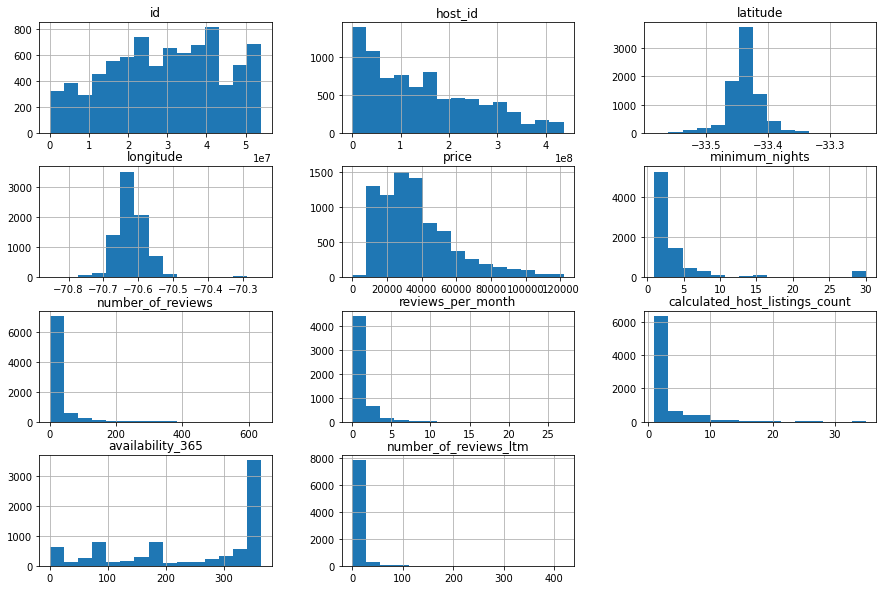

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df_santiago.copy()
df_clean.drop(df_clean[df_clean.price > 121837.50].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **4. Média de preço de aluguel sem os *outliers*.**

In [ ]:
# ver a média da coluna `price``
print("Média dos preços de aluguel(CLP):\t{}".format(round(df_clean.price.mean())))
print("Média dos preços de aluguel por região (CLP):\t{}".format(round(df_clean.groupby(['neighbourhood']).price.mean()).sort_values(ascending=False)))


Média dos preços de aluguel(CLP):	37364
Média dos preços de aluguel por região (CLP):	neighbourhood
Lo Espejo              97540.0
Lo Barnechea           65590.0
Vitacura               49716.0
Las Condes             48114.0
Providencia            40910.0
Cerro Navia            40850.0
Pudahuel               39942.0
El Bosque              36776.0
Huechuraba             35101.0
Cerrillos              35047.0
Peñalolén              34688.0
Santiago               33815.0
Recoleta               33644.0
Estación Central       32515.0
La Florida             31899.0
Renca                  31613.0
San Miguel             31336.0
Quilicura              30459.0
Maipú                  29659.0
Ñuñoa                  28878.0
Macul                  25264.0
San Joaquín            23833.0
La Cisterna            23260.0
La Reina               23253.0
Independencia          22746.0
Conchalí               22384.0
Quinta Normal          21917.0
La Granja              20123.0
Lo Prado               19094.0
P

* De acordo com os dados acima, podemos analisar que a média de preço de aluguéis em Santigo é CLP 37,364. No qual o bairro Lo Espejo apresenta a média mais elevada (CLP 97540.0).
* Acima podemos ver a média do valores por bairro, porém é necessário observar a quantidade de cada amostra para assim podermos confirmar ou não estes valores. Ou seja, temos que analisar se a amostra é representativa para o cálculo. 


In [ ]:
print(df_santiago[df_santiago.neighbourhood == "Lo Espejo"].shape)

# ver a entrada do bairro Lo Espejo
df_santiago[df_santiago.neighbourhood == "Lo Espejo"]

(1, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
643,6386713,viaja a la copa america con comodid,33289113,Angela,NaN,Lo Espejo,-33.51676,-70.67502,Private room,97540,1,0,NaN,NaN,1,365,0,NaN


Por apresentar somente uma saída para o bairro Lo Espejo, não podemos considerar a média dos preços, pois não apresenta amostra significativamente representável.

#### Plotar os imóveis pela latitude-longitude

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

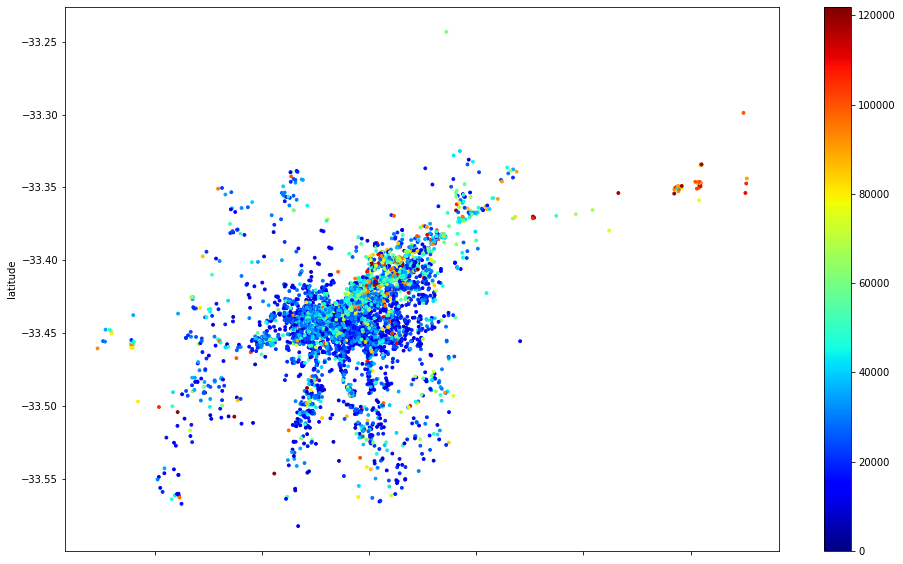

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=1.0, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(16,10));

### **5. Tipo de imóvel mais alugado**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4529
Private room       3394
Shared room         186
Hotel room           85
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.552722
Private room       0.414206
Shared room        0.022700
Hotel room         0.010373
Name: room_type, dtype: float64

### **6. Média do mínimo de noites para aluguel (minimum_nights)**

In [ ]:
# ver a média da coluna `minimum_nights``
print("Média do mínimo de noites para aluguel:\t{}".format(df_clean.minimum_nights.mean()))
print("Mediana do mínimo de noites para alguel:\t{}".format(df_clean.minimum_nights.median()))

Média do mínimo de noites para aluguel:	3.84830363680742
Mediana do mínimo de noites para alguel:	2.0


### **7. Correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.054506,0.019545,0.046903,0.133422,0.059743
minimum_nights,-0.054506,1.000000,0.003056,-0.099273,-0.061796,-0.073080
number_of_reviews,0.019545,0.003056,1.000000,0.631610,0.080313,-0.065485
reviews_per_month,0.046903,-0.099273,0.631610,1.000000,0.135653,0.058719
calculated_host_listings_count,0.133422,-0.061796,0.080313,0.135653,1.000000,0.087593
availability_365,0.059743,-0.073080,-0.065485,0.058719,0.087593,1.000000


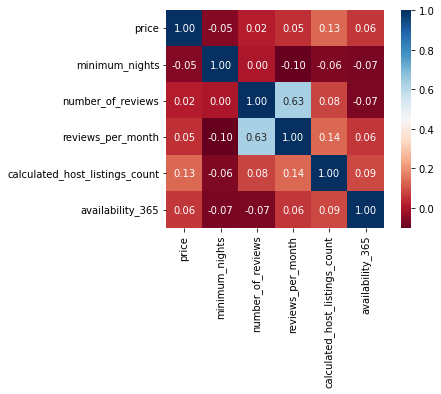

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.